Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductI

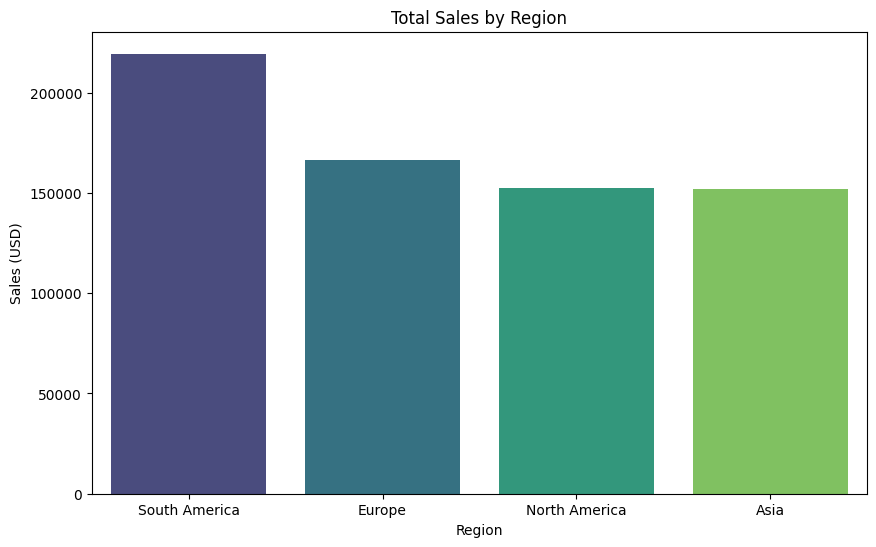

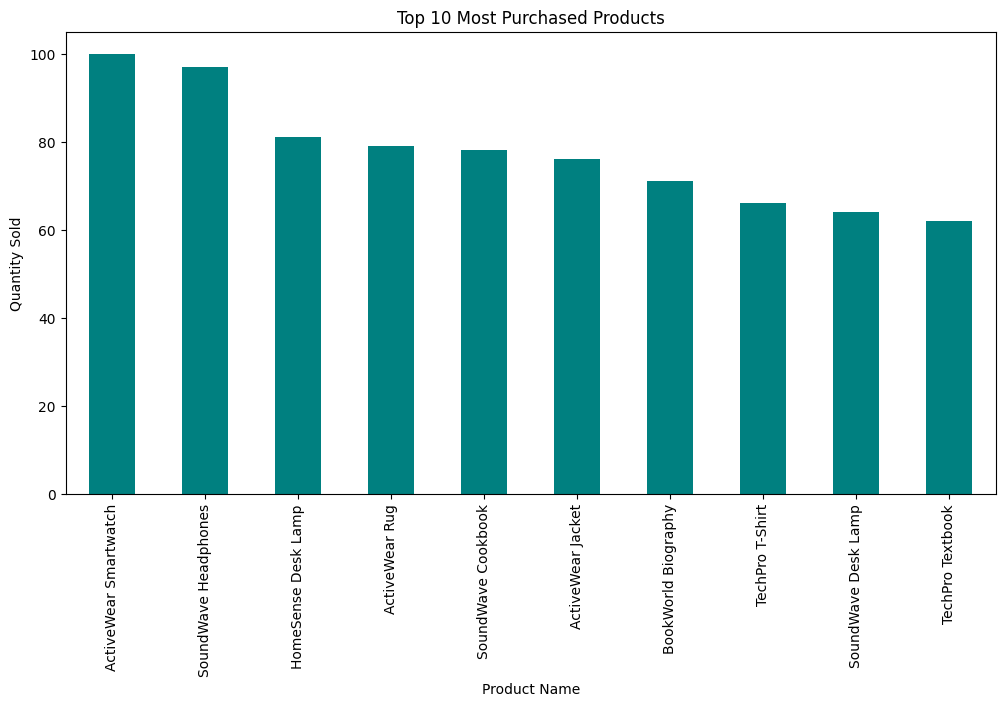

C:\Users\Vineet\AppData\Local\Temp\ipykernel_17752\1764136892.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='muted')


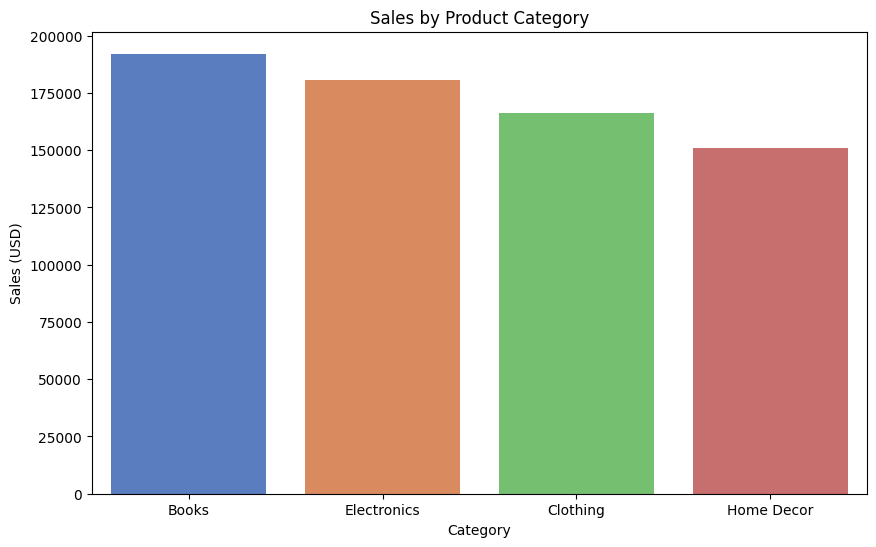

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


print("Customers Dataset:")
print(customers.info())
print(customers.head(), "\n")

print("Products Dataset:")
print(products.info())
print(products.head(), "\n")

print("Transactions Dataset:")
print(transactions.info())
print(transactions.head(), "\n")



print("Missing Values:\n")
print("Customers:\n", customers.isnull().sum(), "\n")
print("Products:\n", products.isnull().sum(), "\n")
print("Transactions:\n", transactions.isnull().sum(), "\n")


customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)


customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])



merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


# Total sales by region
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Total Sales by Region:\n", region_sales)


most_purchased_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Most Purchased Products:\n", most_purchased_products)


top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top Customers by Spend:\n", top_customers)


category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("Category-wise Sales:\n", category_sales)


region_avg_order_value = merged_data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
print("Average Order Value by Region:\n", region_avg_order_value)


plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis', hue=region_sales.index, dodge=False, legend=False)
plt.title("Total Sales by Region")
plt.ylabel("Sales (USD)")
plt.xlabel("Region")
plt.legend([], [], frameon=False)  # This removes the legend entirely
plt.show()



plt.figure(figsize=(12, 6))
most_purchased_products.plot(kind='bar', color='teal')
plt.title("Top 10 Most Purchased Products")
plt.ylabel("Quantity Sold")
plt.xlabel("Product Name")
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='muted')
plt.title("Sales by Product Category")
plt.ylabel("Sales (USD)")
plt.xlabel("Category")
plt.show()



